In [2]:
!pip install gensim numpy pandas matplotlib scikit-learn

In [3]:
import gensim.downloader as api

# Load GloVe (100D)
glove = api.load("glove-wiki-gigaword-100")

# Load Word2Vec (Google News 300D)
word2vec = api.load("word2vec-google-news-300")

# Load FastText
fasttext = api.load("fasttext-wiki-news-subwords-300")

[==================================================] 100.0% 128.1/128.1MB downloaded
[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 958.5/958.4MB downloaded


**Word Similarity**

In [4]:
print("GloVe similarity (king, queen):", glove.similarity("king", "queen"))
print("Word2Vec similarity (king, queen):", word2vec.similarity("king", "queen"))
print("FastText similarity (king, queen):", fasttext.similarity("king", "queen"))

GloVe similarity (king, queen): 0.7507691
Word2Vec similarity (king, queen): 0.6510957
FastText similarity (king, queen): 0.7704246


In [5]:
print("GloVe Analogy:")
print(glove.most_similar(positive=["king", "woman"], negative=["man"]))

print("\nWord2Vec Analogy:")
print(word2vec.most_similar(positive=["king", "woman"], negative=["man"]))

print("\nFastText Analogy:")
print(fasttext.most_similar(positive=["king", "woman"], negative=["man"]))

GloVe Analogy:
[('queen', 0.7698540687561035), ('monarch', 0.6843381524085999), ('throne', 0.6755736470222473), ('daughter', 0.6594556570053101), ('princess', 0.6520534157752991), ('prince', 0.6517034769058228), ('elizabeth', 0.6464517712593079), ('mother', 0.631171703338623), ('emperor', 0.6106470823287964), ('wife', 0.6098655462265015)]

Word2Vec Analogy:
[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321839332581), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.518113374710083), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411403656006)]

FastText Analogy:
[('queen', 0.7786749005317688), ('queen-mother', 0.7143871784210205), ('king-', 0.6981282234191895), ('queen-consort', 0.6724597811698914), ('monarch', 0.6666999459266663), ('child-king', 0.6663159132003784), ('boy-king', 0.6605346202850342), ('princess', 0.653827428817749), ('ex-quee

**PCA Visualization**

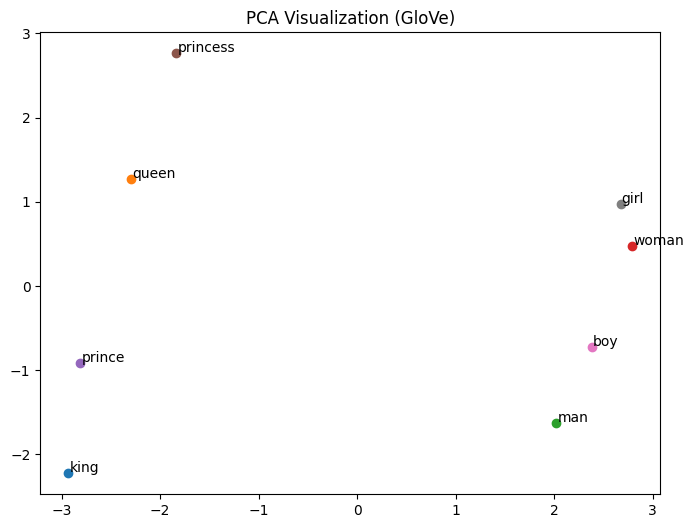

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = ["king","queen","man","woman","prince","princess","boy","girl"]

vectors = [glove[word] for word in words]

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(8,6))
for i, word in enumerate(words):
    plt.scatter(reduced[i,0], reduced[i,1])
    plt.text(reduced[i,0]+0.01, reduced[i,1]+0.01, word)

plt.title("PCA Visualization (GloVe)")
plt.show()

**t-SNE Visualization**

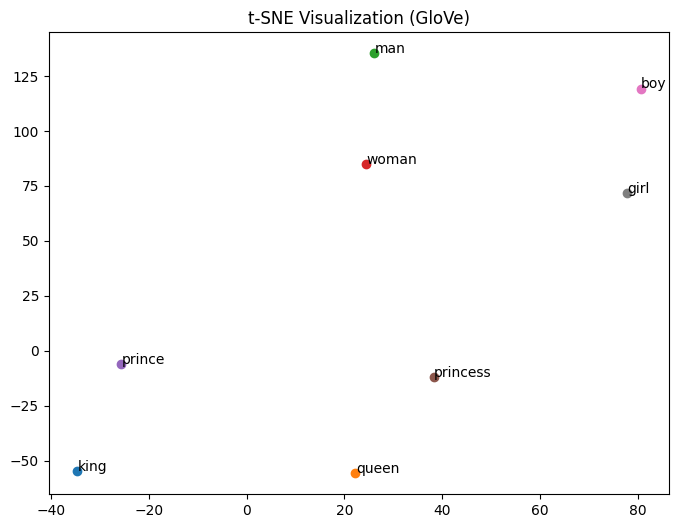

In [7]:
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2, random_state=42, perplexity=5)

reduced_tsne = tsne.fit_transform(np.array(vectors))

plt.figure(figsize=(8,6))
for i, word in enumerate(words):
    plt.scatter(reduced_tsne[i,0], reduced_tsne[i,1])
    plt.text(reduced_tsne[i,0]+0.1, reduced_tsne[i,1]+0.1, word)

plt.title("t-SNE Visualization (GloVe)")
plt.show()

**Compare Models**

In [8]:
models = {
    "GloVe": glove,
    "Word2Vec": word2vec,
    "FastText": fasttext
}

for name, model in models.items():
    print(f"\n{name} Analogy Result:")
    print(model.most_similar(positive=["paris","italy"], negative=["france"], topn=3))


GloVe Analogy Result:
[('rome', 0.8189547061920166), ('milan', 0.7376196980476379), ('naples', 0.7117615342140198)]

Word2Vec Analogy Result:
[('lohan', 0.5069674849510193), ('madrid', 0.481842964887619), ('heidi', 0.4799900949001312)]

FastText Analogy Result:
[('italia', 0.6415424942970276), ('florence', 0.5711471438407898), ('hilton', 0.548441469669342)]


**OOV (Out-of-Vocabulary) Test**

In [9]:
test_word = "chatgpt"

print("GloVe contains word?", test_word in glove)
print("Word2Vec contains word?", test_word in word2vec)
print("FastText contains word?", test_word in fasttext)

GloVe contains word? False
Word2Vec contains word? False
FastText contains word? False
